# Cufflinks

In [6]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [4]:
plyo.init_notebook_mode(connected = True)

In [7]:
a = np.random.standard_normal((250, 5)).cumsum(axis = 0)
index = pd.date_range('2019-1-1', freq = 'B', periods = len(a))
df = pd.DataFrame(100 + 5 * a, columns = list('abcde'), index = index)
df.head()

,a,b,c,d,e
2019-01-01,109.699189,101.133291,89.746628,101.842003,101.546632
2019-01-02,110.871060,85.403355,82.802042,103.693598,107.309149
2019-01-03,107.177867,84.486791,75.116716,94.454134,102.714674
2019-01-04,107.219212,89.622454,73.195722,98.945365,101.079655
2019-01-07,106.771181,87.466389,75.843997,98.803527,99.598592


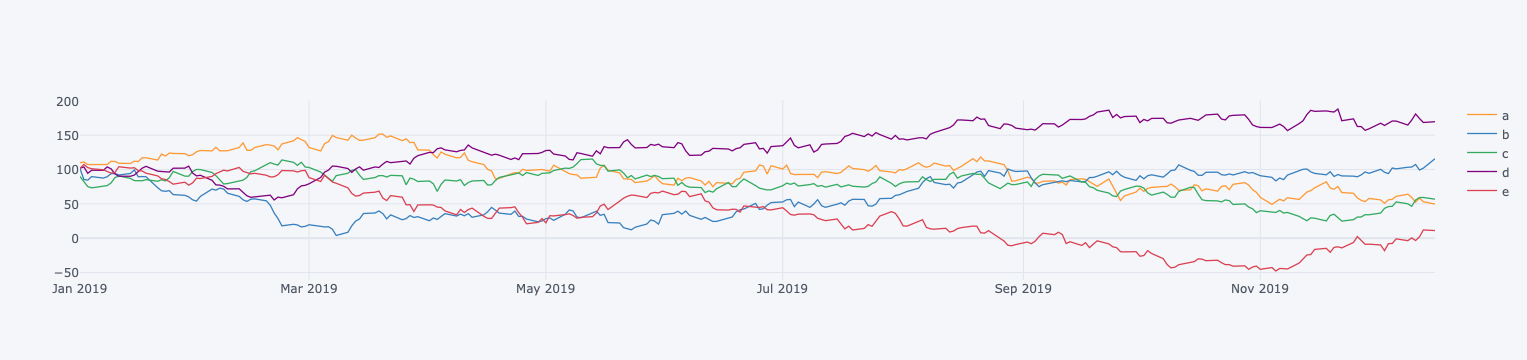

In [8]:
plyo.iplot(df.iplot(asFigure = True),
           filename = 'ply_01')

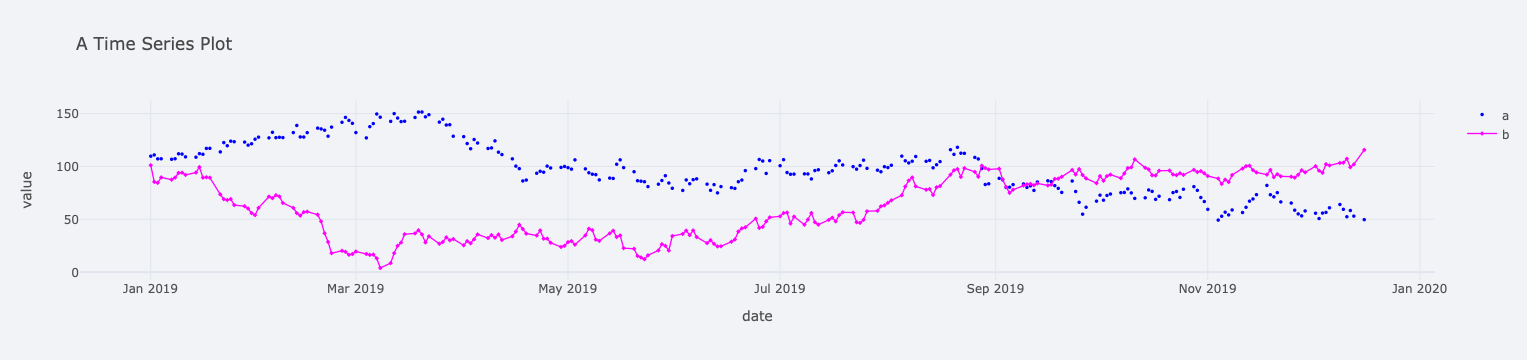

In [9]:
plyo.iplot(
    df[['a', 'b']].iplot(asFigure=True,
                         theme='polar',
                         title='A Time Series Plot',
                         xTitle='date',
                         yTitle='value',
                         mode={'a': 'markers', 'b': 'lines+markers'},
                         symbol={'a': 'circle', 'b': 'diamond'},
                         size=3.5,
                         colors={'a': 'blue', 'b': 'magenta'},
    ),
    # image='png',
    filename='ply_02'
)

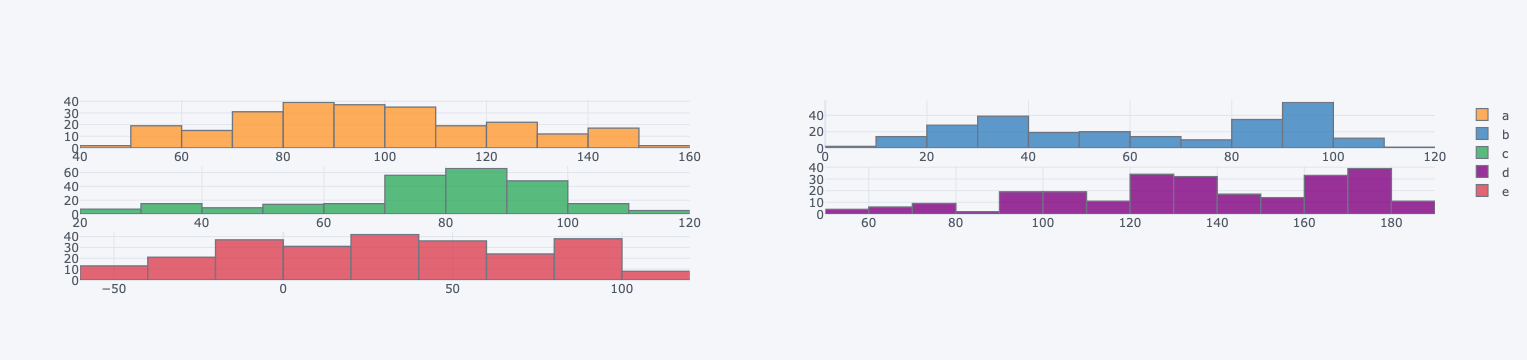

In [10]:
plyo.iplot(
    df.iplot(kind='hist',
             subplots=True,
             bins=15,
             asFigure=True),
    # image='png',
    filename='ply_03'
)

## 1. Financial plots

In [11]:
raw = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi/master/jupyter36/source/fxcm_eur_usd_eod_data.csv',
                  index_col = 0,
                  parse_dates = True)
raw

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
Date,,,,,,,,,,
2007-06-03,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
2007-06-04,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2007-06-05,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
2007-06-06,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
2007-06-07,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238
...,...,...,...,...,...,...,...,...,...,...
2017-05-27,21:00:00,1.11784,1.11784,1.11677,1.11681,1.11808,1.11808,1.11743,1.11788,48
2017-05-28,21:00:00,1.11681,1.11894,1.11613,1.11622,1.11788,1.11906,1.11626,1.11660,119787
2017-05-29,21:00:00,1.11622,1.12048,1.11087,1.11842,1.11660,1.12064,1.11100,1.11882,285165


In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        2820 non-null   object 
 1   OpenBid     2820 non-null   float64
 2   HighBid     2820 non-null   float64
 3   LowBid      2820 non-null   float64
 4   CloseBid    2820 non-null   float64
 5   OpenAsk     2820 non-null   float64
 6   HighAsk     2820 non-null   float64
 7   LowAsk      2820 non-null   float64
 8   CloseAsk    2820 non-null   float64
 9   TotalTicks  2820 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [13]:
quotes = raw[['OpenAsk','HighAsk','LowAsk','CloseAsk']]
quotes = quotes.iloc[-60:]
quotes.tail()

,OpenAsk,HighAsk,LowAsk,CloseAsk
Date,,,,
2017-05-27,1.11808,1.11808,1.11743,1.11788
2017-05-28,1.11788,1.11906,1.11626,1.11660
2017-05-29,1.11660,1.12064,1.11100,1.11882
2017-05-30,1.11882,1.12530,1.11651,1.12434
2017-05-31,1.12434,1.12574,1.12027,1.12133


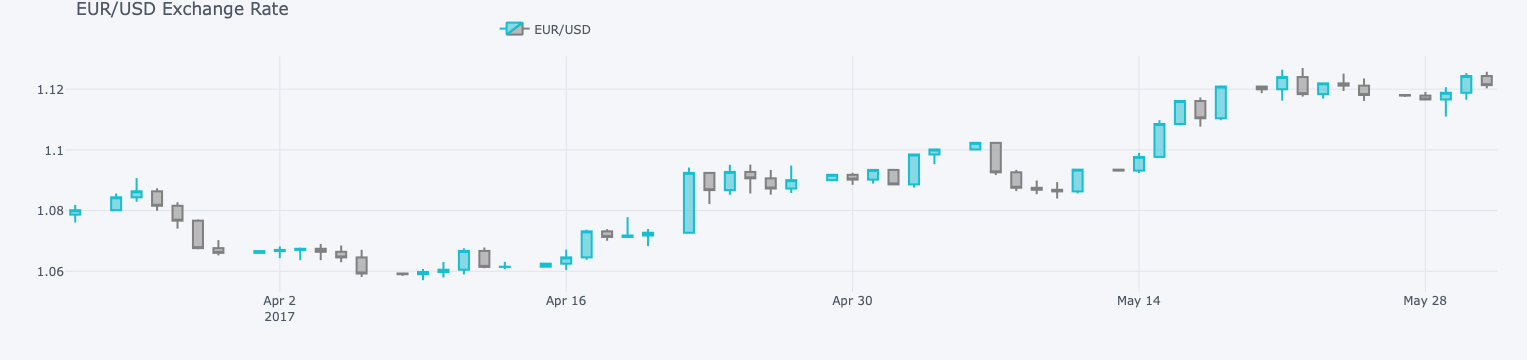

In [14]:
qf = cf.QuantFig(
    quotes,
    title = 'EUR/USD Exchange Rate',
    legend = 'top',
    name = 'EUR/USD')

plyo.iplot(
    qf.iplot(asFigure = True),
    filename = 'qf_01')

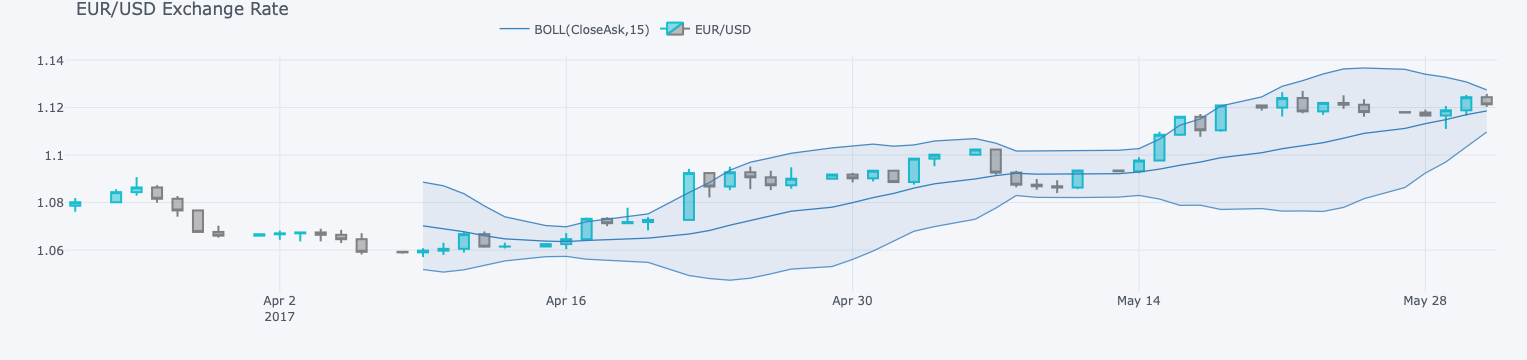

In [15]:
qf.add_bollinger_bands(periods = 15, boll_std = 2)
plyo.iplot(qf.iplot(asFigure = True), filename = 'qf_02')

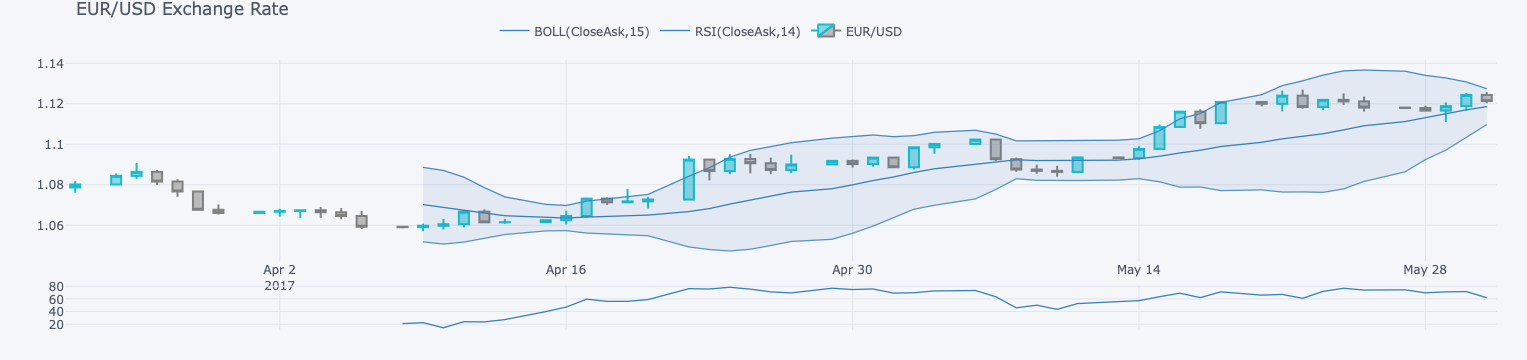

In [16]:
qf.add_rsi(periods = 14, showbands = False)
plyo.iplot(qf.iplot(asFigure = True), filename = 'qf_03')